In [1]:
from PIL import Image
import os.path, sys
from skimage.io import imread, imshow
import cv2
from skimage import data, color, feature , exposure
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
import glob
import os

from _helper_functions import resize_aspect_fit , _calc_texture_gradient ,get_lbp_feat

# --------------------------------------Train Data-----------------------------------------

In [2]:
path = '/Users/toothless/Downloads/Thesis/data/Train/lbp_img/cancer/'
can_re = resize_aspect_fit(path,150)

In [3]:
path = '/Users/toothless/Downloads/Thesis/data/Train/lbp_img/_nocancer/'
ncan_re = resize_aspect_fit(path,150)

In [4]:
print(can_re.shape)
print(ncan_re.shape)

(7272, 150, 150, 3)
(6778, 150, 150, 3)


In [5]:
train_can , test_can = can_re[:6544] , can_re[6544:]
train_ncan , test_ncan = ncan_re[:6100] , ncan_re[:6100]

In [7]:
lcan_labels = np.ones(train_can.shape[0])
lnocan_labels = np.zeros(train_ncan.shape[0])


#Cancatenate Features and labels
features = np.concatenate((train_can,train_ncan),axis = 0)
labels = np.concatenate((lcan_labels,lnocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [8]:
# Convert Features to Array and Save it
labels = train_df.pop('labels')
features = train_df.values

features = np.reshape(features,(features.shape[0],150,150,3))

In [9]:
print(features.shape)
print(labels.shape)

(12644, 150, 150, 3)
(12644,)


In [12]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/LBP + CNN/data/Train_LBP_v2',
                    features_lbp=features, labels_lbp=labels)

# ----------------------------------TEST DATA------------------------------------------

In [13]:
testcan_labels = np.ones(test_can.shape[0])
testnocan_labels = np.zeros(test_ncan.shape[0])


#Cancatenate Features and labels
features = np.concatenate((test_can,test_ncan),axis = 0)
labels = np.concatenate((testcan_labels,testnocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [14]:
# Convert Features to Array and Save it
labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
features = np.reshape(features,(features.shape[0],150,150,3))

In [15]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/LBP + CNN/data/Test_LBP_v2',
                    features_lbp=features, labels_lbp=labels)

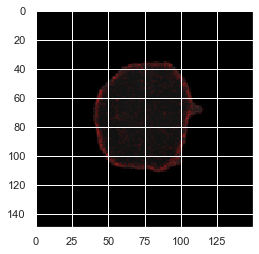

In [17]:
plt.imshow(features[0])